# Mock CSA bacterial identification data
----
Reference: (Lonsdale et. al., 2013, http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0062726#s4)  
With reference to the above publication, we shall produce data that correspond to the expected behaviour of CSA signals when exposed to growing bacteria in a petridish. 



In [415]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['animation.html'] = 'html5'

In [35]:
# GLOBAL CONSTANTS
NUM_CHEM_SPOTS = 20
EXPT_DURATION = 1001 # minutes
EXPT_TIME_INTERVAL = 20
COLOR_CHANNELS = ['R', 'G', 'B']
TIME_STAMP_TEMPLATE = "csa_experiment_minute_%s"


columns = ["%s%i" % (c, num) for num in range(1, NUM_CHEM_SPOTS +1) for c in COLOR_CHANNELS]
time_stamps = [TIME_STAMP_TEMPLATE % minute for minute in range(0, EXPT_DURATION, EXPT_TIME_INTERVAL)]

In [255]:
def sigmoid(t):
    """
    The standard sigmoidal function
    """
    return 1.0 / (1 + np.exp(-t))

def heaviside(x):
    """
    The Heaviside function with jump at x = 0.
    """
    return gaussian_filter1d(np.array(x >= 0.0, dtype=np.int), sigma=2.0)

def get_species_responsive_spots(num_channels=3 * NUM_CHEM_SPOTS):
    """
    Return a random subsequence of the (1, 2, ..., num_channels)
    to be the responsive time series of a species.
    """
    return np.arange(1, num_spots +1, 1)[(np.random.rand(num_spots) > 0.5)]

def get_species_signature(num_channels=3 * NUM_CHEM_SPOTS, num_options=2):
    return np.random.randint(0, num_options, num_channels)

def create_data(active_channels):
    """
    Create a single species level data. 
    """
    return 


def normalise(array):
    return array / (np.max(array) - np.min(array))

In [410]:
time = np.arange(0, 100)
red_func = lambda t: 0.1 * np.ones(len(t))
green_func = lambda t : 0.9 * sigmoid(0.3 * (t - 50))
blue_func = lambda t : 0.9 - 0.8 * sigmoid(0.5 * (t - 40))
curve1 = np.array([red_func(time), green_func(time), blue_func(time)]).transpose()
curve2 = np.array([red_func(time) + 0.01, green_func(time) + 0.01, blue_func(time)]).transpose()
curve3 = np.array([red_func(time) - 0.02, green_func(time), blue_func(time) * 0.5]).transpose()


red_func2 = lambda t: 0.8 * sigmoid(0.7 * (np.clip(t, 0, 60) - 20))
green_func2 = lambda t: 0.01 * np.ones(len(t)) + sigmoid((t - 40) * 5) * 0.5 * sigmoid(0.4 * (t - 60))
blue_func2 = lambda t: 0.9 * sigmoid(0.3 * (t - 30)) - sigmoid((t - 40) * 4) * 0.6 * sigmoid(0.5 * (t - 60))
curve4 = np.array([red_func2(time), green_func2(time), blue_func2(time)]).transpose()
curve5 = np.array([red_func2(time), green_func2(time), blue_func2(time) * 0.8]).transpose()
curve6 = np.array([red_func2(time), 0.01 * np.ones(len(time)) + 0.1, 0.9 * sigmoid(0.3 * (time - 30))]).transpose()

red_func3 = lambda t: 0.1 * np.ones(len(t)) + 0.5 * sigmoid(0.5 * (t - 50))
green_func3 = lambda t : 0.9 * sigmoid(0.3 * (t - 50))
blue_func3 = lambda t : 0.9 - 0.2 * sigmoid(0.5 * (t - 40))
curve7 = np.array([red_func3(time) + 0.01, green_func3(time), blue_func3(time) - 0.1]).transpose()
curve8 = np.array([red_func3(time), green_func3(time * 0.99), blue_func3(time)]).transpose()
curve9 = np.array([red_func3(time) + 0.1, green_func3(time), blue_func3(time)]).transpose()


all_curves = np.array([curve1, curve2, curve3, curve4, curve5, curve6, curve7, curve8, curve9])

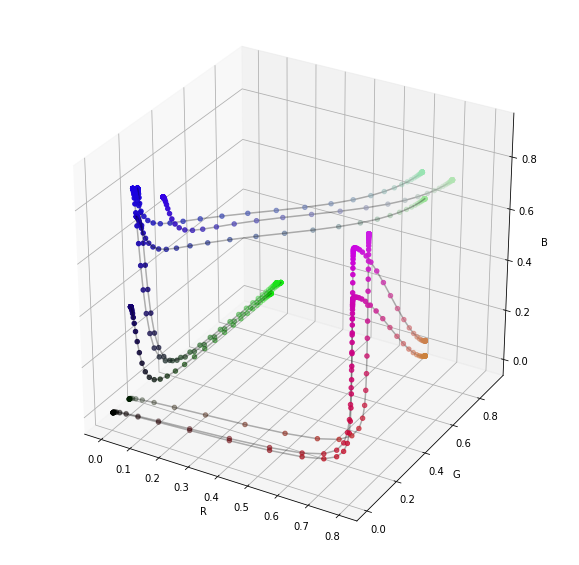

In [411]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

for curve in all_curves:
    ax.scatter3D(xs=curve[:, 0], ys=curve[:, 1], zs=curve[:, 2], c = curve)
    ax.plot3D(curve[:, 0], curve[:, 1], zs = curve[:, 2], alpha=0.3, color='black')

In [ ]:
for coord in curve:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve[:, 2], alpha=0.3, color='black')
    
for coord in curve2:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve2[:, 2], alpha=0.3, color='black')


for coord in curve3:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve3[:, 2], alpha=0.3, color='black')

    
for coord in curve4:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve4[:, 2], alpha=0.3, color='black')


for coord in curve5:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve5[:, 2], alpha=0.3, color='black')


for coord in curve6:
    ax.scatter(*coord, c=coord)
ax.plot3D(curve[:, 0], curve[:, 1], zs = curve6[:, 2], alpha=0.3, color='black')


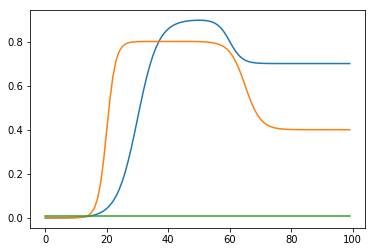

In [305]:
plt.plot(blue_func2(time))
plt.plot(red_func2(time))
plt.plot(green_func2(time))
#plt.plot(sigmoid((time - 60) * 3))

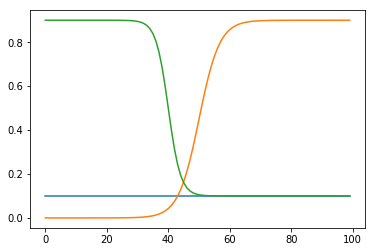

In [278]:
plt.plot(time, red_func(time))
plt.plot(time, green_func(time))
plt.plot(time, blue_func(time))

In [ ]:
red
def generate_curves(red_func, green_func, blue_func):
    

In [79]:
options =[lambda t: np.ones(len(t)) * np.random.rand(),
          lambda t: -0.8 * sigmoid(t - EXPT_DURATION / 2.0) + 1, 
          lambda t: 0.7 * sigmoid(np.clip(t, 0, EXPT_DURATION * 0.4) + EXPT_DURATION / 2) + \
          heaviside(t - EXPT_DURATION * 0.8),
          lambda t: np.clip(t, 0, EXPT_DURATION * 0.4) ** 2 / (EXPT_DURATION * 0.4)**2, 
          lambda t: t / EXPT_DURATION, 
          lambda t: sigmoid(2 * (t + EXPT_DURATION * 0.6))]


signature = get_species_signature(num_options=len(options))
df = pd.DataFrame(index=time_stamps, columns=columns)
time = np.arange(0, EXPT_DURATION, EXPT_TIME_INTERVAL)
for i, col in enumerate(df.columns):
    signal_func = options[signature[i]]
    df.loc[:, col] = signal_func(time)
    
    
    

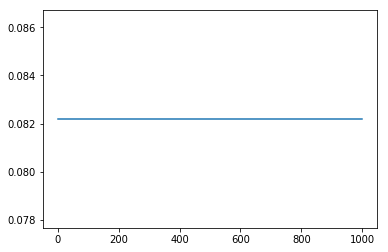

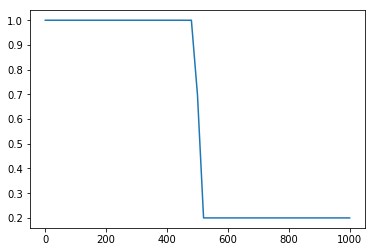

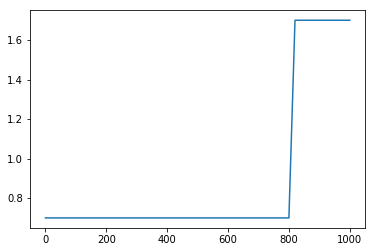

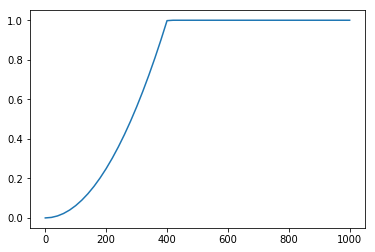

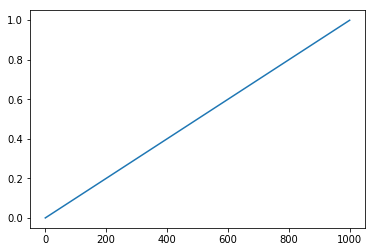

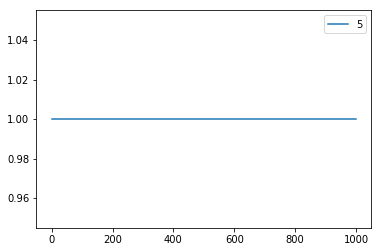

In [80]:
for i, func in enumerate(options):
    plt.figure()
    plt.plot(time, func(time), label=i)
plt.legend()

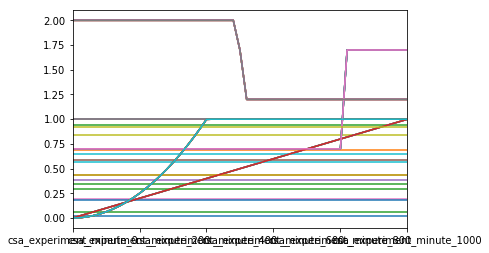

In [74]:
df.plot(legend=False)

## Animation
----

In [414]:
TIME_INTERVAL = 20
TIME_TEMPLATE = "%.1f min"
TIME_FONTSIZE = 20
def animate_parametric_curves(frame_i, ax, curves, lines, time_text):
    for i, coords in enumerate(curves):
        #normalising_factor = np.max(coords)
        # Draw updata the line data 
        line = lines[i]
        line.set_data(coords[:frame_i, 0], coords[:frame_i, 1]) # x and y coord
        line.set_3d_properties(coords[:frame_i, 2]) # z coord
        # Then we plot the (frame_i)th coordinate of the current curve 
        # and give it the correct colour
        ax.scatter3D(coords[frame_i, 0], coords[frame_i, 1], coords[frame_i, 2], 
                     c = coords[frame_i])# / normalising_factor)
    time_text.set_text(TIME_TEMPLATE % (frame_i * TIME_INTERVAL))
    return ax

CPU times: user 1min 50s, sys: 5.89 s, total: 1min 56s
Wall time: 1min 54s


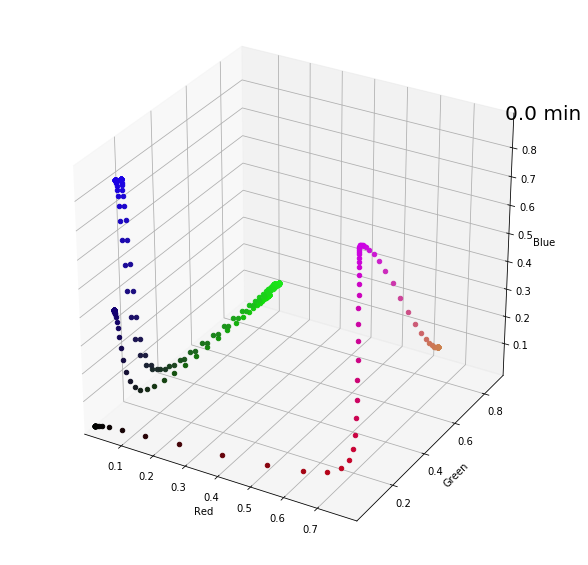

In [416]:
%%time 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

curves = all_curves[:4]
ax.set_xlim((curves[:, :, 0].min(), curves[:, :, 0].max()))
ax.set_ylim((curves[:, :, 1].min(), curves[:, :, 1].max()))
ax.set_zlim((curves[:, :, 2].min(), curves[:, :, 2].max()))
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
#ax.set_title("Trajectories of chemical spots in colour space")

time_template = 'time = %.1f min'
time_text = ax.text3D(ax.get_xlim3d()[-1], 
                      ax.get_ylim3d()[-1], 
                      ax.get_zlim3d()[-1],
                      '',
                      size=TIME_FONTSIZE)


lines = [ax.plot3D(coords[0:1, 0], coords[0:1, 1], coords[0:1, 2],
                   lw=0.5, alpha=0.5, color='black')[0] 
         for coords in curves]


ani = animation.FuncAnimation(fig, animate_parametric_curves, 
                              frames=curves.shape[1], 
                              fargs=(ax, curves, lines, time_text), 
                              interval=100)
ani.save('test_ani2.mp4')

In [421]:
from matplotlib import rc
rc('animation', html='html5')
ani

KeyboardInterrupt: 

In [423]:
x = all_curves.copy()

In [427]:
print(x.shape)
x.reshape(9, 300)

(9, 100, 3)


array([[  1.00000000e-01,   2.75312004e-07,   8.99999998e-01, ...,
          1.00000000e-01,   8.99999628e-01,   1.00000000e-01],
       [  1.10000000e-01,   1.00002753e-02,   8.99999998e-01, ...,
          1.10000000e-01,   9.09999628e-01,   1.00000000e-01],
       [  8.00000000e-02,   2.75312004e-07,   4.49999999e-01, ...,
          8.00000000e-02,   8.99999628e-01,   5.00000000e-02],
       ..., 
       [  1.10000000e-01,   2.75312004e-07,   8.00000000e-01, ...,
          6.10000000e-01,   8.99999628e-01,   6.00000000e-01],
       [  1.00000000e-01,   2.75312004e-07,   9.00000000e-01, ...,
          6.00000000e-01,   8.99999500e-01,   7.00000000e-01],
       [  2.00000000e-01,   2.75312004e-07,   9.00000000e-01, ...,
          7.00000000e-01,   8.99999628e-01,   7.00000000e-01]])